## Twitter Sentiment Analysis of Trump's Tweets

##### Author: Jessica Khaskheli


##### Collaborators: None


##### Date: May 6, 2022

In [59]:
import pandas as pd
import numpy as np

# importing dataset
trump = pd.read_csv("trump_20200530.csv")

##### Asking questions

- Can we analyze the amount of misinformation that Trump's tweets contain throughout time?

    My reasoning behind this question is, Trump is known for spreading misinformation on Twitter, which is why he was banned. I'm curious to see if the number of tweets that he tweeted that contain misinformation increased or stayed the same overtime.
    
    
- Does Trump tweet mostly positive or mostly negative tweets throughout time and how does this relate to the timeline of events that occurred at the same time of his tweets?
    
    I'm interested to see how the sentiment of Trump's tweets changed or evolved throughout his presidency and how that relates to the events happening during that time. Was the sentiment of his tweets in the first half of his presidency different or more positive than in the second half? Or was the sentiment of this tweets more or less at the same level throughout hsi presidency? Does he tweet about a certain social or political issue often or just certain ones?
    
    
- What kinds of words were included in his tweets that results in them being favorited the most?
    
    I'm curious to explore what words he mentioned in the tweets that got him the most favorites and if there's a pattern behind the kinds of words (or themes) he mentioned that are more popular amongst his followers than others. My hope is that exploring this question would give more insight into what topics/words Trump tweeted about that increased his engagement.

##### Inspection & Data Cleaning 

In [549]:
# looking at head of df
trump.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,2020-05-30 03:20:18,42879,164022,False,1266570099454103553
10,Twitter for iPhone,https://t.co/mljmx2o0G7,2020-05-29 19:46:15,48713,176310,False,1266455834457968640
11,Twitter for iPhone,Looting leads to shooting and that’s why a man...,2020-05-29 18:20:06,52444,241219,False,1266434153932894208
12,Twitter for iPhone,....It was spoken as a fact not as a statement...,2020-05-29 18:20:06,31263,158594,False,1266434155543506945
13,Twitter for iPhone,REVOKE 230!,2020-05-29 15:15:41,38582,195262,False,1266387743996870656


In [61]:
# looking at datatypes of all columnsm, shape of df and column names
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18467 entries, 0 to 18466
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          18467 non-null  object
 1   text            18467 non-null  object
 2   created_at      18467 non-null  object
 3   retweet_count   18467 non-null  int64 
 4   favorite_count  18467 non-null  int64 
 5   is_retweet      18409 non-null  object
 6   id_str          18467 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1010.0+ KB


In [62]:
# checking to see if there are NaN values, how many of them and where
trump.isna().value_counts()

source  text   created_at  retweet_count  favorite_count  is_retweet  id_str
False   False  False       False          False           False       False     18409
                                                          True        False        58
dtype: int64

##### Observations from Inspection:
- I found that this dataframe consists of 18467 rows of tweets and 7 columns, including information on the time and date that the tweet was created, the actual tweet, whether it was a retweet and the retweet count, the favorite count and the unique id number.
- From looking at the full dataframe when I loaded it, I saw that the first time a tweet was created was in 2017 and the last time was in 2020, however, when using the min( ) and max( ) functions to see if the the dates were consistent, I found that the dates were being pull by the month rather than the year which showed that the data format was incorrect.
- I found that there were 6337 tweets that had a 'favorite_count' value of 0 and I wasn't sure if this should be considered as NaN entries. I looked at those rows and saw that although the 'favorite_count' value was 0, the 'retweet_count' had an actual value and that every entry in the 'retweet_count' column had a nonzero value.
- I used the isna( ) function to inspect if the dataframe contained any NaN entries and found that it only pulled out 58 rows from the 'is_retweet' column. These 58 rows are not actually NaN entries, but they're entries marked as 'True' if the tweet was a retweet.

##### Data cleaning

In [63]:
# dropping any NaN values
trump = trump.dropna()

In [64]:
# converting object to boolean int so I can drop RT tweets easier
#trump["is_retweet"] = trump["is_retweet"].astype(int)

In [65]:
# only using non-retweet tweets
trump.drop(trump.index[trump['is_retweet'] == True], inplace=True)

# 'is_retweet' with a value of 1 means it is a retweet and it was removed, a value of 0 means it wasn't a retweet

In [257]:
# converting created_at variable format into datetime so that I can output the correct min/max dates
trump['created_at'] = pd.to_datetime(trump['created_at'])

In [258]:
# checking that 'created_at' variable shows the correct min and max dates of tweets created
trump['created_at'].min(), trump['created_at'].max()

(Timestamp('2017-01-20 12:31:53'), Timestamp('2020-05-30 03:20:18'))

In [259]:
# resetting index to 'created_at' for cleaner dataframe
trump.set_index('created_at')

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2020-05-30 03:20:18,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,42879,164022,False,1266570099454103553
2020-05-29 19:46:15,Twitter for iPhone,https://t.co/mljmx2o0G7,48713,176310,False,1266455834457968640
2020-05-29 18:20:06,Twitter for iPhone,Looting leads to shooting and that’s why a man...,52444,241219,False,1266434153932894208
2020-05-29 18:20:06,Twitter for iPhone,....It was spoken as a fact not as a statement...,31263,158594,False,1266434155543506945
2020-05-29 15:15:41,Twitter for iPhone,REVOKE 230!,38582,195262,False,1266387743996870656
...,...,...,...,...,...,...
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,60604,218555,False,822502270503972872
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,42790,180394,False,822502135233384448
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,18362,91143,False,822501939267141634


In [82]:
# displaying rows that are still retweets but are marked as false in the 'is_retweet' field
trump[1000:1010]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
1219,Twitter for iPhone,RT @CDCgov: The latest CDC #COVIDView report w...,04-25-2020 12:12:52,3420,0,False,1254020552605544448
1220,Twitter for iPhone,RT @CDCgov: If you have diabetes you are at hi...,04-25-2020 12:12:10,3753,0,False,1254020376071454720
1221,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,04-24-2020 21:39:42,7476,0,False,1253800812855386113
1222,Twitter for iPhone,I will be having a White House Press Conferenc...,04-24-2020 20:51:16,13732,107487,False,1253788620642750464
1223,Twitter for iPhone,https://t.co/x8Yguxf4Ks,04-24-2020 20:13:18,9232,47558,False,1253779068560039939
1224,Twitter for iPhone,I will never let our Post Office fail. It has ...,04-24-2020 19:08:09,31321,179828,False,1253762674137149446
1225,Twitter for iPhone,RT @HouseGOP: 🚨 President Trump just signed th...,04-24-2020 17:02:47,8149,0,False,1253731120811839488
1226,Twitter for iPhone,RT @FinancialCmte: #BREAKING: President @RealD...,04-24-2020 17:02:20,6336,0,False,1253731010665230336
1227,Twitter for iPhone,RT @SenateGOP: ✓ SIGNEDPresident @realdonaldtr...,04-24-2020 17:02:05,5871,0,False,1253730946752413696
1228,Twitter for iPhone,Great conversation with President Lenin Moreno...,04-24-2020 14:59:34,17008,82226,False,1253700113383534598


##### Observations and Rationale for Cleaning:

- As mentioned in the inspection process, I found that the dates were in an unruly format to be pulled when looking for the minimum and maximum dates. Therefore, I converted the 'create_at' variable to datetime format and now the tweets can be pulled out by the year first so that we can see the true minimum and maximum dates.

- I wrote code to drop tweets with a value of True in the field 'is_retweet'. I then checked to make sure all of those rows were dropped. However, if you observe a snippet of the dataframe above this markdown box, you can see that in the 'text' field, some tweets start with 'RT' which I believe is still a retweet but those rows are marked as 'False' in thw 'is_retweet' field. These tweets are taken from rows 1000 to 1010 but there are at least 100 more rows of tweets that start with 'RT'. I'm unsure if these tweets weren't labeled correctly however I decided to leave them in and state this discrepancy in any further analysis that I do.

In [363]:
trump_tweetslist = trump['text'].tolist() # here, the order of rows is preserved

In [364]:
# importing english stopwords for cleaning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stopenglish = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [365]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

cleaned_trump_tweets = []
for row in trump_tweetslist:
    row  = re.sub('[.-]', '', row)
    row = row.lower()
    #remove urls
    row  = re.sub(r'http\S+', '', row)
    #remove mentions
    row = re.sub(r"(?<![@\w])@(\w{1,25})", '', row)
    #remove hashtags
    row = re.sub(r"(?<![#\w])#(\w{1,25})", '',row)
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row) 
    # removing rt in text
    row  = re.sub(r'rt', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    row = re.sub('\-','', row)
    row = re.sub('\.','', row)
    row = re.sub('\n','', row)
    row = re.sub('\,','', row)
    tokens = word_tokenize( row.lower() )
    tokens_nostop = [w for w in tokens if w not in stopenglish]
    cleaned_title = " ".join(tokens_nostop)
    cleaned_trump_tweets.append(cleaned_title)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


##### Observations and Rationale after more Cleaning:
- From the intial scan of the raw data, I also observed many punctuation marks, emojis, words in all capital letters, url links and @ mentions. In the code above, I chose to convert all of the text to lowercase, remove urls, hasthtags, special characters, and digits. I also removed the text 'RT' in the rows that were marked as False for the 'is_retweet- field. I did this so that processing and analysis would be easier, however, if these tweets are actually retweets, I can mention that not all of the tweets I analyzed are Trump's tweets but his retweets as well.
- I also noticed that he used a lot of question marks and exclamation points, so I've removed those as well during the cleaning process.


##### Tokenizing:

##### Plan:

I will write code to tokenize my entire  dataset.  I plan to first use 3 different tokenizers and display the results in a dataframe to compare them visually so I can choose the best one to move forward with.

#### Explanation before writing code:
- I plan to use word_tokenize, TweetTokenizer and WhitespaceTokenizer. I will apply the tokenizers and assign the output to their own variables. Then I will convert these three variables into dataframes, and then concatenate these dataframes together so that I can easily look at them when inspecting the differences visually.

In [30]:
from nltk.tokenize import word_tokenize, TweetTokenizer, WhitespaceTokenizer

# Using word_tokenize Tokenizer
wt = word_tokenize(str(cleaned_trump_tweets))
# Using tweet Tokenizer
tt = TweetTokenizer().tokenize(str(cleaned_trump_tweets))
# Using whitespace Tokenizer
wtsp = WhitespaceTokenizer().tokenize(str(cleaned_trump_tweets))

# converting all lists to dataframes
tt_df = pd.DataFrame(tt)
tt_df.rename(columns = {0:'tweettoken'}, inplace = True)

wt_df = pd.DataFrame(wt)
wt_df.rename(columns = {0:'wordtoken'}, inplace = True)

wtsp_df = pd.DataFrame(wtsp)
wtsp_df.rename(columns = {0:'whitespacetoken'}, inplace = True)

# combining all data frames into one
tokenizers = pd.concat([tt_df, wt_df, wtsp_df], axis = 1)
tokenizers[0:15] # showing first couple rows to visually compare

,tweettoken,wordtoken,whitespacetoken
0,[,[,['time
1,','time,"change',"
2,time,change,"'',"
3,change,','looting
4,',",",leads
5,",",``,shooting
6,',",",thats
7,','looting,man
8,",",leads,shot
9,',shooting,killed


#### 2d) Best Tokenizer Rationale

In my opinion, the WhitespaceTokenizer works the best for my data because it doesn't separately tokenize the apostrophies that occur from having my data in a list. The data must be in list form to pass through the different tokenizer functions and because of this, the TweetTokenizer and word_tokenize Tokenizer captured the apostrophies and brackets while the Whitespace Tokenizer noticed the space between two tweets.The TweetTokenizer would work best to use on tweets if there were a lot of exclamation or question marks and we wanted to capture those to analyze for sentiment, however in this case, since all punctuation marks were removed from the data, I can see that the Whitespace Tokenizer tokenizes the words best by considering the whitespace and separating the tweets once with the apostrophies and doesn't dedicate a row for every single punctuation mark like the others do. This separation can be seen in row 2.

##### Analyzing Data for Sentiment

##### Plan:
I plan to use VADER, TextBlob and Empath to conduct sentiment analysis and compare their performances.

##### Sentiment Analysis

In [545]:
# converting cleaned tweets back to a dataframe 
clean_tt = pd.DataFrame(cleaned_trump_tweets)
clean_tt.rename(columns = {0:'tweet'}, inplace = True) # renaming column to 'tweet'

clean_tt['tweet'].replace('', np.nan, inplace=True) # changing empty strings to NaN
clean_tt = clean_tt.dropna() # dropping NaN rows
# clean_t = clean_tt.reset_index(drop = True) # reindexing

#### Method 1: Vader Sentiment Analysis

#### Explanation before writing code:
- To perform sentiment analysis with Vader, I plan to loop through the entire cleaned dataset (clean_tt) and calculate the polarity score. I will then set thresholds for what should be scored as positive, negative and neutral. These thresholds are as follows: any thing with a score of 0.5 or larger will be marked as 'positive' and appended to an array, anything less than a score of 0 will be marked as 'negative' and everything else will be marked as neutral.
- I will created two empty arrays, one will be so tthat I can append the numerical scores and one so that I can append a written score of either 'Positive Sentiment', 'Negative Sentiment' or 'Neutral Sentiment'.

In [194]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [579]:
# calculating sentiment of a tweet using Vader
vader_senti = []
written_senti = []
for i in range(len(clean_tt)):
        analyzer = SentimentIntensityAnalyzer()
        scores = analyzer.polarity_scores(clean_tt.iloc[i, 0])
        vader_senti.append(scores)
        if scores['compound'] >= 0.5:
            written_senti.append("Positive Sentiment")
        elif scores['compound'] < 0:
            #print("Negative Sentiment")
            written_senti.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_senti.append("Neutral Sentiment")
            
vader_df = pd.DataFrame(vader_senti)

In [348]:
# appending tweets and sentiment to vader sentiment dataframe
vader_df['tweet'] = clean_tt
vader_df['sentiment'] = written_senti

In [398]:
# printing dataframe of vader sentiments and tweets
vader_df = vader_df.dropna() # removing NaN

print('Count of Vader Sentiment scores:')
print(vader_df.value_counts('sentiment'))
vader_df

Count of Vader Sentiment scores:
sentiment
Neutral Sentiment     5260
Positive Sentiment    5096
Negative Sentiment    4661
dtype: int64


,index,neg,neu,pos,compound,tweet,sentiment
0,0,0.000,1.000,0.000,0.0000,time change,Neutral Sentiment
1,2,0.361,0.504,0.134,-0.6597,looting leads shooting thats man shot killed m...,Negative Sentiment
2,3,0.000,1.000,0.000,0.0000,spoken fact statement simple nobody problem ha...,Neutral Sentiment
3,4,0.309,0.435,0.256,-0.2748,revoke,Negative Sentiment
4,5,0.346,0.486,0.168,-0.5106,national guard arrived scene minneapolis fully...,Negative Sentiment
...,...,...,...,...,...,...,...
15012,15751,0.000,1.000,0.000,0.0000,promised campaign ms gang continues busts ms m...,Neutral Sentiment
15013,15752,0.123,0.526,0.351,0.3818,whether tapes recordings conversations james c...,Neutral Sentiment
15014,15753,0.000,0.714,0.286,0.3400,recently repoed electronic surveillance interc...,Neutral Sentiment
15015,15754,0.123,0.877,0.000,-0.1027,ceainly hope democrats force nancy p would bad...,Negative Sentiment


#### Method 2: TextBlob Sentiment Analysis

#### Explanation before writing code:

##### Plan:

To perform sentiment analysis with Empath, my process will be the similar to my code for sentiment analysis with Vader. I will have two separate empty arrays, one for the numerical scores and one for the written scores (positive, negative and neutral). I will loop through the dataset with the same threshold for scoring as I had for Vader, then create a dataframe of these two arrays and the tweets.

In [368]:
# calculating polarity of tweet using Textblob
from textblob import TextBlob
textblob_senti = []
written_pol = []
for i in range(len(clean_tt)):
        blob = TextBlob(clean_tt.iloc[i, 0])
        polarity = blob.polarity
        textblob_senti.append(polarity)
        if polarity >= 0.5:
            written_pol.append("Positive Sentiment")
        elif polarity < 0:
            #print("Negative Sentiment")
            written_pol.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_pol.append("Neutral Sentiment")

In [394]:
# appending polarity, tweet and quantitative polarity score to df
textblob_df = pd.DataFrame(textblob_senti) # converting to df
textblob_df.rename(columns = {0:'polarity'}, inplace = True) # renaming column to polarity
textblob_df['tweet'] = clean_tt # appending tweet
textblob_df['sentiment'] = written_pol # appending written sentiment
textblob_df.dropna() # dropping na values

,polarity,tweet,sentiment
0,0.000000,time change,Neutral Sentiment
2,-0.055556,looting leads shooting thats man shot killed m...,Negative Sentiment
3,0.000000,spoken fact statement simple nobody problem ha...,Neutral Sentiment
4,0.000000,revoke,Neutral Sentiment
5,0.000000,national guard arrived scene minneapolis fully...,Neutral Sentiment
...,...,...,...
15751,0.000000,promised campaign ms gang continues busts ms m...,Neutral Sentiment
15752,0.000000,whether tapes recordings conversations james c...,Neutral Sentiment
15753,0.000000,recently repoed electronic surveillance interc...,Neutral Sentiment
15754,-0.500000,ceainly hope democrats force nancy p would bad...,Negative Sentiment


In [397]:
print('Count of TextBlob Sentiment scores:')
print(textblob_df.value_counts('sentiment'))

Count of TextBlob Sentiment scores:
sentiment
Neutral Sentiment     10046
Negative Sentiment     3525
Positive Sentiment     2185
dtype: int64


#### Method 3: Empath Category Analysis

#### Explanation before writing code:

##### Plan:

My plan for using Empath is finding the categories for each tweet, and then pulling the most common categories (10 or so). Then scoring the sentiment of these categories.

In [353]:
from empath import Empath

In [354]:
lexicon = Empath()

In [ ]:
# function to find most common words in a list
from collections import Counter
from collections import defaultdict
def commonwords(alist):
    string = " ".join(alist)
    wordlist = string.split(" ")
    wordcount = Counter(wordlist)
    return(wordcount.most_common(30))

In [ ]:
# finding all categories associated to word in tweets
empath_categ = []
for i in range(len(clean_tt)):
        category = lexicon.analyze(clean_tt.iloc[i, 0])
        for key, value in category.items():
            if value != 0:
                empath_categ.append(key)

In [359]:
# viewing most common categories in list of categories for each tweet
from collections import Counter
from collections import defaultdict
def commonwords(alist):
    string = " ".join(alist)
    wordlist = string.split(" ")
    wordcount = Counter(wordlist)
    return(wordcount.most_common(10)) # viewing 10 most common categories
commonwords(empath_categ)

[('government', 4605),
 ('leader', 4370),
 ('positive_emotion', 4272),
 ('achievement', 4020),
 ('business', 3824),
 ('politics', 3389),
 ('negative_emotion', 3382),
 ('giving', 3354),
 ('law', 2944),
 ('work', 2860)]

##### Observations for Sentiment Analysis:
- For my 3 methods for sentiment analysis, I used Vader, TextBlob and Empath. I noticed that Vader took a significantly longer time to run than TextBlob and Empath but Empath was following closely behind Vader for long runtimes. I also noticed from visual inspection of the dataframe containing sentiment scores from Vader, that the compound scores took on a wider range of values than the values that the polarity scores took on for TextBlob. From visual inspection of some of the polarity scores, I found that TextBlob usually scored tweets as neutral with a score of '0'. 
- Additionally, I only included polarity scores when I used TextBlob and disregarded subjectivity because I only wanted to focus on comparing polarity and sentiment scores between TextBlob and Vader. However, comparing how the subjectivity and polarity varied amongst tweets might be something I would change if I were to do this again to better understand why more tweets were scored as neutral using TextBlob.
- My third method for sentiment analysis was Empath. My approach was to loop through the cleaned tweets dataframe, collect all of the categories that Empath pulls out from these tweets, and then pass this list of categories through a function that calculates the most common words from this list. Empath took a while to finish running the code because it was pulling out a list of categories for each tweet. I then pulled out the top 10 most common words form this list of categories, where I found that amongst this collection, categories like 'government', 'leader', 'positive_emotion' and 'negative_emotion' were amongst the most commonly mentioned categories. It was a coincidence that 'positive_emotion' and 'negative_emotion' were in the top 10 categories mentioned because I was able to compare the counts with the other two methods I used for sentiment analysis.
- In addition, I'm not sure exactly what occurred during my cleaning process or the sentiment analysis, but my dataframe contained at least 400 rows of empty strings, so I converted those rows to NaN and dropped them from both the Vader and TextBlob dataframes containing the sentiment scores and I still ended up having the same number of rows in both dataframes.

##### Pairwise Comparison of all Methods

I want to do a pairwise comparison on all of the methods I picked and compute a quantitative measure.

In [393]:
# printing the number of Positive, Negative and Neutral sentiment scores for each method
print("--Textblob Counts--")
print(textblob_df['sentiment'].value_counts())
print("--Vader Counts--")
print(vader_df['sentiment'].value_counts())
print("--Empath Counts--")
print(commonwords(empath_categ))

--Textblob Counts--
Neutral Sentiment     10046
Negative Sentiment     3525
Positive Sentiment     2185
Name: sentiment, dtype: int64
--Vader Counts--
Neutral Sentiment     5260
Positive Sentiment    5096
Negative Sentiment    4661
Name: sentiment, dtype: int64
--Empath Counts--
[('government', 4605), ('leader', 4370), ('positive_emotion', 4272), ('achievement', 4020), ('business', 3824), ('politics', 3389), ('negative_emotion', 3382), ('giving', 3354), ('law', 2944), ('work', 2860)]


Calculating Differences:

- Positive Sentiment:
    - Vader and TextBlob: 2911
    - Vader and Empath: 824
    - Empath and Textblob: 2087
- Negative Sentiment:
    - Vader and TextBlob: 1136
    - Vader and Empath: 1279
    - Empath and Textblob: 143
- Neutral Sentiment:
    - Vader and TextBlob: -4786


##### Observations for Pairwise Comparison:

- Ideally for this pairwise comparison, I would've liked to add an additional column in either the Vader sentiment dataframe or the TextBlob sentiment dataframe with values taking on either True or False. The value would be false if the sentiments compared in the Vader and TextBlob dataframes did not match and it would be True if they did match. Then I could use value.counts( ) to see how many tweets in both methods were classified with the same sentiment and how many differed. I wasn't able to do this method because I kept running into errors with the dataframe formatting.

- Instead, I used value_counts( ) to calculate the proportion of Negative, Positive and Neutral sentiment in the tweets for the Vader and TextBlob methods and then manually calculated the difference of counts under each sentiment score. This method does not show me the specific tweets and how each one was classified depending on the method, but I can see which method classified more tweets with a positive sentiment score rather than a negative one.

- I found that the Vader sentiment method classified more tweets with a positive sentiment score than either Empath and TextBlob did. TextBlob classified the most number of tweets as Neutral with a value of 10046. Vader also classified more tweets as Negative than TextBlob did. 

- Empath and TextBlob classified almost the same number of negative sentiment occurences with a difference of 143.

- In this pairwise comparison, my quantitative measure is the difference between the tweets classified as positive, negative or neutral between TextBlob and Vader. I'm not including Empath officially because I pulled out the most common categories and positive and negative emotion *happened* to be the top 10 common categories, which no neutral category included. The difference between Vader and TextBlob was 2911 for scoring positive sentiment, with Vader scoring more positive sentiment. The difference was 4786 for scoring neutral sentiment with TextBlob scoring more tweets as neutral. This makes me think that TextBlob has a higher threshold for scoring tweets as positive or Vader has a lower threshold for scoring tweets as positive since there was a much larger number of tweets scored as neutral for TextBlob. And the difference was 1136 for tweets scored as negative.


##### Qualitatively coding 25 random tweets and comparing with a computational method

##### Plan:
I plan to qualitatively code 25 random tweets as positive, negative or neutral sentiment and compare the results against the results from VADER. The qualitatively coded results will be held as ground truth.

In [443]:
# selecting random sample of tweets
rand_samp = clean_tt.sample(n=25)
rand_samp

,tweet
837,happened general michael flynn war hero never ...
414,must careful crazy nancy would total disaster ...
3436,adam schiffs impeachment sham paisan unconstit...
10302,america created jobs march beating expectations
8746,china relationship continues good one quality ...
12614,big story fbi ignored tens thousands crooked h...
13113,confidence kim jong un honor contract signed a...
13888,funny watch fake news networks among dishonest...
10650,sessions didnt clue
6645,rep turner calls adam schiff making fiction co...


#### Coding Tweet Sentiment by hand:

- row 837: positive
- row 414: negative
- row 3436: negative
- row 10302: positive
- row 8746: positive
- row 12614: negative
- row 13113: positive
- row 13888: negative
- row 10650: neutral
- row 6645: negative
- row 12780: negative
- row 13759: negative
- row 2583: neutral
- row 905: neutral
- row 9361: negative
- row 2343: negative
- row 11620: neutral
- row 16112: neutral
- row 13011: neutral
- row 11384: negative
- row 2227: negative
- row 1600: positive
- row 7120: neutral
- row 2197: neutral
- row 10311: positive

In [449]:
# Using Vader on random sample
vader = []
written_sentiment = []
for i in range(len(rand_samp)):
        analyzer = SentimentIntensityAnalyzer()
        scores = analyzer.polarity_scores(rand_samp.iloc[i, 0])
        vader.append(scores)
        if scores['compound'] >= 0.5:
            written_sentiment.append("Positive Sentiment")
        elif scores['compound'] < 0:
            #print("Negative Sentiment")
            written_sentiment.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_sentiment.append("Neutral Sentiment")
            
vader_rand = pd.DataFrame(vader)

In [452]:
vader_rand['sentiment'] = written_sentiment
print(vader_rand['sentiment'].value_counts())
vader_rand

Neutral Sentiment     12
Negative Sentiment     7
Positive Sentiment     6
Name: sentiment, dtype: int64


,neg,neu,pos,compound,sentiment
0,0.202,0.466,0.332,0.3612,Neutral Sentiment
1,0.414,0.488,0.098,-0.7346,Negative Sentiment
2,0.437,0.563,0.000,-0.7351,Negative Sentiment
3,0.333,0.444,0.222,-0.2500,Negative Sentiment
4,0.076,0.678,0.246,0.6124,Positive Sentiment
5,0.188,0.741,0.071,-0.5849,Negative Sentiment
6,0.161,0.518,0.322,0.7096,Positive Sentiment
7,0.370,0.405,0.225,-0.6915,Negative Sentiment
8,0.000,1.000,0.000,0.0000,Neutral Sentiment
9,0.000,1.000,0.000,0.0000,Neutral Sentiment


In [453]:
# Using TextBlob on random sample
textblob = []
written_polarity = []
for i in range(len(rand_samp)):
        blob = TextBlob(rand_samp.iloc[i, 0])
        polarity = blob.polarity
        textblob_senti.append(polarity)
        if polarity >= 0.5:
            written_polarity.append("Positive Sentiment")
        elif polarity < 0:
            #print("Negative Sentiment")
            written_polarity.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_polarity.append("Neutral Sentiment")

In [457]:
textblob_rand = pd.DataFrame(textblob)
textblob_rand['sentiment'] = written_polarity
print(textblob_rand['sentiment'].value_counts())
textblob_rand

Neutral Sentiment     19
Negative Sentiment     6
Name: sentiment, dtype: int64


,sentiment
0,Neutral Sentiment
1,Negative Sentiment
2,Negative Sentiment
3,Neutral Sentiment
4,Neutral Sentiment
5,Negative Sentiment
6,Negative Sentiment
7,Negative Sentiment
8,Neutral Sentiment
9,Neutral Sentiment


#### Rationale for Random Sample Sentiment Analysis:
- I hand coded most of the tweets from the random sample as negative or neutral, with 7 being neutral, 11 being negative and 6 being positive. From visual inspection, the TextBlob method worked the best because it didn't classify any of the tweets as positive, only neutral and negative sentiment.
- From looking at the results from Vader, it seems like me and vader scored the tweets with opposite scores most of the time. Therefore, if we take my hand coded results as the absolute truth, then TextBlob performed better on this random sample.
- To keep in mind, I wasn't able to save my random sample so that it doesn't change when I rerun it. Therefore upon submission, I suspect that the random sample I was looking at might be different than the one that would print out after I upload for submission.

##### Analyzing Data with LIWC Dictionary

##### Plan:
I plan to choose three different dimensions from the LIWC dictionary to find the proportion of tweets that fall under these three dimensions.

#### Explanation before writing code:
- My plan for this question is to manually extract the 3 dimensions of interest and create a csv file. Then import csv file and create a dictionary. Then I will add a column that will take on a value of any of the three dimension titles and will refer to the dictionary as it looks at each row of the dataframe. This way, I'll easily be able to see which tweet was associated with which dimension.

**Rationale for Research questions:**

LIWC Dimensions: We, Cause, and NegEmo

- How did Trump unite his followers or did the language he used in his tweets reflect unity? I'm curious if Trump used words from the "We" dimension in order to make his followers feel included in order to gain traction.
- I wonder if I can use the "Cause" dimension to observe how many times he used words to motivate change, or convince his followers that he would change things. My reasoning behind this research question comes from his slogan: "MAGA" which leads me to question if he used "Cause" words to drive the notion that he would make change.
- Keeping in mind that Trump used the phrase "fake news" often when speaking, what proportion of Trump's tweets contain words from the "Negemo" dimension?

In [169]:
# importing liwc dimensions from computer
myliwc = pd.read_csv("cleanliwc.csv")
myliwc

,another,Pronoun,let's,We,activat*,Cause,ain't,Negate,add,Quant,dismay*,Negemo
0,anybod*,Pronoun,lets,We,affect,Cause,aint,Negate,added,Quant,disreput*,Negemo
1,anymore,Pronoun,our,We,affected,Cause,aren't,Negate,adding,Quant,diss,Negemo
2,anyone*,Pronoun,ours,We,affecting,Cause,arent,Negate,adds,Quant,dissatisf*,Negemo
3,anything,Pronoun,ourselves,We,affects,Cause,can't,Negate,all,Quant,distraught,Negemo
4,deez,Pronoun,us,We,aggravat*,Cause,cannot,Negate,allot,Quant,distress*,Negemo
...,...,...,...,...,...,...,...,...,...,...,...,...
149,yourself,Pronoun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hungover,Negemo
150,yourselves,Pronoun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hurt*,Negemo
151,youve,Pronoun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,idiot*,Negemo
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ignorable,Negemo


In [170]:
# creating dictionaries of my liwc dimensions for we, cause and negemo
liwc = {} # creating empty dictionary
liwc_we = {column[2] : column[3] for _, column in pd.read_csv("cleanliwc.csv").iterrows()} # we dimension
#liwc_we
liwc_cause = {column[4] : column[5] for _, column in pd.read_csv("cleanliwc.csv").iterrows()} # cause dimension
#liwc_cause
liwc_negemo = {column[10] : column[11] for _, column in pd.read_csv("cleanliwc.csv").iterrows()} # negemo dimension
#liwc_cause

In [171]:
# appending all 3 dictionaries into 1 dictionary
liwc.update(liwc_we)
liwc.update(liwc_cause)
liwc.update(liwc_negemo)
# removing NaN values from dictionary
liwc_dict = {key:value for key, value in liwc.items() if key == key}

In [185]:
# liwc_dict = liwc.to_dict('dict')
# print(liwc_dict)

In [183]:
# adding column for value and searching for word from liwc_dict in trump tweets
clean_tt['Value'] = clean_tt['tweet'].str.extract('('+'|'.join(liwc_dict)+')', expand=False).map(liwc_dict)
print(clean_tt)

print(clean_tt.value_counts('Value')) # printing count of values for each dimension


# clean_tt.loc[clean_tt['Value'] == 'Negemo'] # inspecting content of tweets marked with specific dimension
# clean_tt.loc[clean_tt['Value'] == 'Cause']
# clean_tt.loc[clean_tt['Value'] == 'We']

                                                   tweet  Value
0                                            time change  Cause
1                                                           NaN
2      looting leads shooting thats man shot killed m...  Cause
3      spoken fact statement simple nobody problem ha...    NaN
4                                                 revoke    NaN
...                                                  ...    ...
16562  january th remembered day people became rulers...    NaN
16563  truly matters party controls government whethe...    NaN
16564    power washington dc giving back american people     We
16565  today merely transferring power one administra...     We
16566  begins today see swearingin movement continues...     We

[16567 rows x 2 columns]
Value
We        4084
Cause     1574
Negemo     698
dtype: int64


##### Rationale:
- Of the three dimensions from LIWC that I selected, "We" had the largest proportion present in my data with 4084 tweets marked as "We" which is about 24.6%."Cause" words took on a proportion of about 9.5% and "Negemo" took on a proportion of about 4.21% of the total data.
- With respect to my research question above, a nontrivial number of words that Trump used in his tweets are from the "We" dimension which seems to tie close to unity and inclusion from my perspective.
- One question that this raises for me is how my function labeled tweets if they happened to contain words from two dimensions. In other words, if a tweet was labeled as "We" but also contained words in the "Cause" dimension. This might be a limitation of my code.

##### Analyzing Data over time 

I'm curious to understand the polarity of my corpus and how it changes over time. I will show the results through time series plots and draw inferences based on the results.

#### Explanation before writing code:
- My plan is to append the sentiment scores (numerical) from Vader and TextBlob to the cleaned tweets dataframe and add the 'created_at' variable to it. Then I can pull the time and the sentiment scores for each method and plot a time series plot using 'lineplot' from seaborn.

In [578]:
# importing seaborn library and my cleaned dataset again
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
clean_tt['original'] = trump['created_at']
clean_tt = clean_tt.dropna()
clean_tt['sentiment'] = vader_df['compound']

clean_tt = pd.DataFrame(cleaned_trump_tweets)
clean_tt.rename(columns = {0:'tweet'}, inplace = True)

/var/folders/b7/rmg3hfx52jv9khn6bbm73w8c0000gn/T/ipykernel_99771/73970309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tt['original'] = trump['created_at']
/var/folders/b7/rmg3hfx52jv9khn6bbm73w8c0000gn/T/ipykernel_99771/73970309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tt['sentiment'] = vader_df['compound']


In [481]:
# pasting the code for Vader sentiment analysis because when I was doing the sentiment analysis for random sample,
# my code updated so to only 25 rows instead of the full dataframe of 16k + tweets
vader_senti = []
written_senti = []
for i in range(len(clean_tt)):
        analyzer = SentimentIntensityAnalyzer()
        scores = analyzer.polarity_scores(clean_tt.iloc[i, 0])
        vader_senti.append(scores)
        if scores['compound'] >= 0.5:
            written_senti.append("Positive Sentiment")
        elif scores['compound'] < 0:
            #print("Negative Sentiment")
            written_senti.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_senti.append("Neutral Sentiment")
            
vader_df = pd.DataFrame(vader_senti)
senti_df = pd.DataFrame(written_senti)

In [547]:
# adding relevant variables into my cleaned data frame from Problem 2 when I did the cleaning step
clean_tt['sentiment'] = vader_df['compound']
clean_tt['time'] = trump['created_at']
clean_tt['written'] = senti_df
clean_tt = clean_tt.dropna()

In [557]:
# dropping duplicate dates so that we can condense the amount of data we need to plot
clean_tt['time'].drop_duplicates()

3       2020-05-30 03:20:18
10      2020-05-29 19:46:15
11      2020-05-29 18:20:06
13      2020-05-29 15:15:41
14      2020-05-29 14:46:56
                ...        
16504   2017-10-28 12:22:12
16505   2017-10-28 02:13:28
16506   2017-10-28 00:05:45
16507   2017-10-27 23:33:14
16508   2017-10-27 21:17:31
Name: time, Length: 13760, dtype: datetime64[ns]

[Text(0, 0.5, 'Vader Sentiment')]

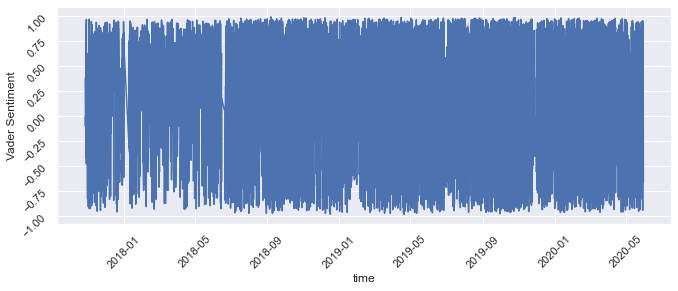

In [577]:
sns.set(rc={'figure.figsize':(11, 4)}) # enlarging plot window

plot = sns.lineplot(x = 'time', y ='sentiment', data = clean_tt) # plotting data

plot.tick_params(rotation = 45) # rotating x axis labels
plot.set(ylabel= "Vader Sentiment")

In [560]:
# repasting sentiment analysis code using TextBlob 
textblob_senti = []
written_pol = []
for i in range(len(clean_tt)):
        blob = TextBlob(clean_tt.iloc[i, 0])
        polarity = blob.polarity
        textblob_senti.append(polarity)
        if polarity >= 0.5:
            written_pol.append("Positive Sentiment")
        elif polarity < 0:
            #print("Negative Sentiment")
            written_pol.append("Negative Sentiment")
        else:
            #print("Neutral Sentiment")
            written_pol.append("Neutral Sentiment")

In [568]:
# adding sentiment scores from textblob into my cleaned dataframe
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

textblob_df = pd.DataFrame(textblob_senti)
textblob_df.rename(columns = {0:'polarity'}, inplace = True) # renaming column to polarity
clean_tt['textblob'] = textblob_df

/var/folders/b7/rmg3hfx52jv9khn6bbm73w8c0000gn/T/ipykernel_99771/2582190706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tt['textblob'] = textblob_df


In [571]:
# droppign NaN values
textblob = clean_tt.dropna()

[Text(0, 0.5, 'TextBlob Sentiment')]

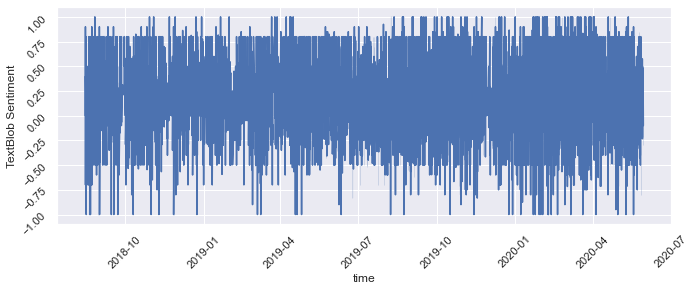

In [575]:
# plotting Textblob sentiment analysis time series plot
sns.set(rc={'figure.figsize':(11, 4)}) # enlarging plot window

plot = sns.lineplot(x = 'time', y ='textblob', data = textblob) # plotting data

plot.tick_params(rotation = 45) # rotating x axis labels
plot.set(ylabel='TextBlob Sentiment')

#### Inferences from Time Series plot:

- From the Vader Sentiment time series plot, although it's very crowded and I wasn't able to condense or limit the amount of data I was plotting, I can still see that there are more negative tweets towards the end of Trump's time on Twitter than there was in the beginning. I draw this inference because the concentration of negative sentiment scores fills the area at the bottom of the plot more in the '2020' year range on the x-axis than there is in the '2018' year range. I infer that the increased number of negative tweets came from the pandemic happening and Trump tweeting more about fake news and the pandemic being less of a big deal than it actually was. As his presidency continued through time, more negative events occurred that I'm hypothesizing caused him to tweet more negative tweets compared to what he tweeted when he first came into office.
- In the TextBlob Sentiment time series plot, I observe the same pattern as I did in the Vader Sentiment plot. The prevalence of negative tweets grows from 2018 to 2020, with there being a larger concentration of negative tweets in the 2020 year range. The TextBlob method scores more tweets as neutral than Vader, so that's why the points are concentrated more in the middle of the plot at 0.